# DBSCAN
https://www.datacamp.com/tutorial/dbscan-clustering-algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Gerando dados de amostra

In [10]:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

## Visualizando o conjunto de dados

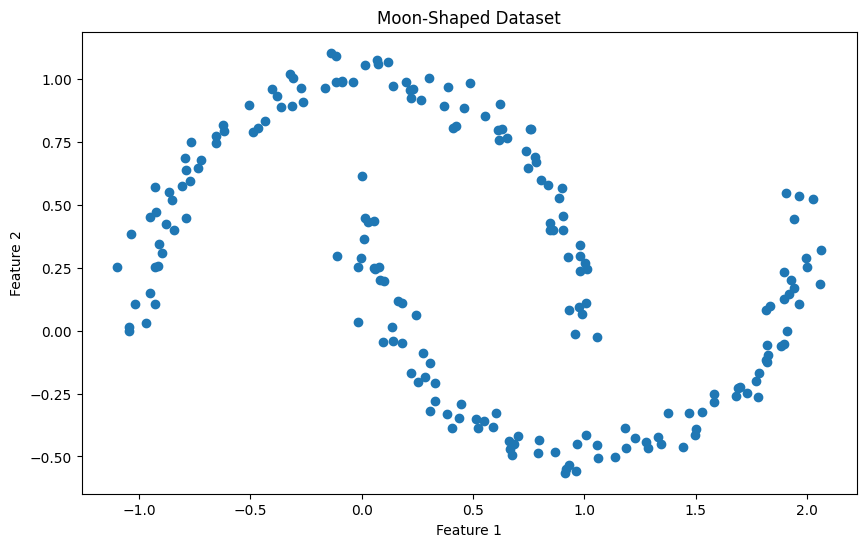

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Moon-Shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Determinando o parâmetro epsilon

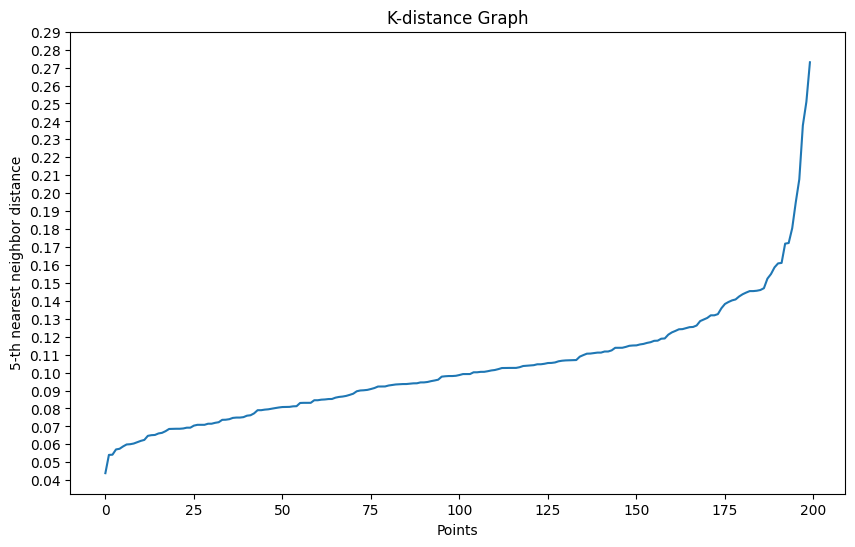

In [ ]:
# Função para plotar o gráfico de k-distance
def plot_k_distance_graph(X, k):
  neigh = NearestNeighbors(n_neighbors=k)
  neigh.fit(X)
  distances, _ = neigh.kneighbors(X)
  distances = np.sort(distances[:, k-1])
  plt.figure(figsize=(10, 6))
  plt.plot(distances)
  plt.xlabel("Points")
  plt.ylabel(f"{k}-th nearest neighbor distance")
  plt.title("K-distance Graph")


  # Define os limites do eixo Y e cria os ticks de 0.02 em 0.02
  y_min = np.floor(min(distances) * 100) / 100  # Arredonda para baixo (múltiplo de 0.02)
  y_max = np.ceil(max(distances) * 100) / 100   # Arredonda para cima (múltiplo de 0.02)
  yticks = np.arange(y_min, y_max + 0.02, step=0.02)
  plt.yticks(yticks)
  
plot_k_distance_graph(X, k=5)

Ou seja, com base nesse gráfico, podemos encontrar a onde acontece o "cotovelo", ou seja, nosso epsilon em 0.15, sendo este, nossa distância máxima.

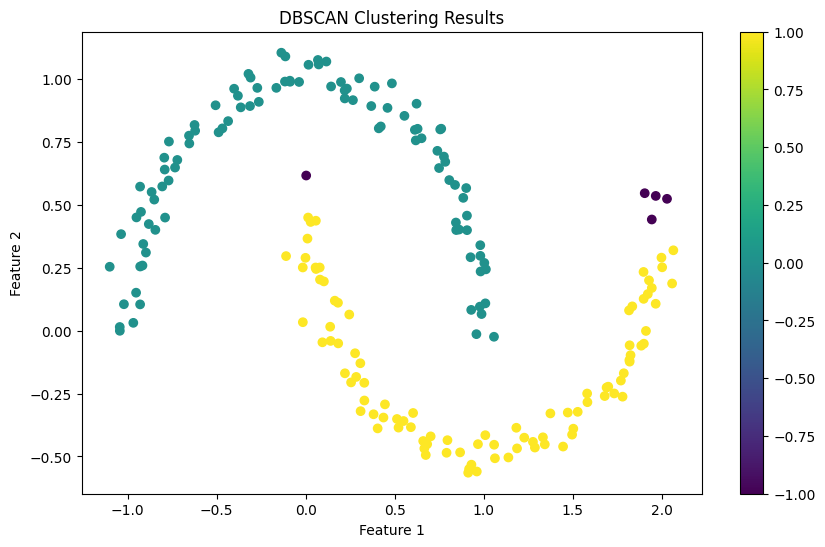

In [38]:
epsilon = 0.15
min_samples = 5 # 2 * num_features (2d data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Visualizando os resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Interpretando os resultados

In [48]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) #Removendo o ruido da quantidade de clusters
n_noise = list(clusters).count(-1)

print(f'Number of clusters: {n_clusters}')  #Quantidade de cores nos pontinhos
print(f'Number of noise points: {n_noise}') #Pontinhos roxos

Number of clusters: 2
Number of noise points: 5


#### DBSCAN x K-Means

Text(0.5, 1.0, 'K-Means Clustering')

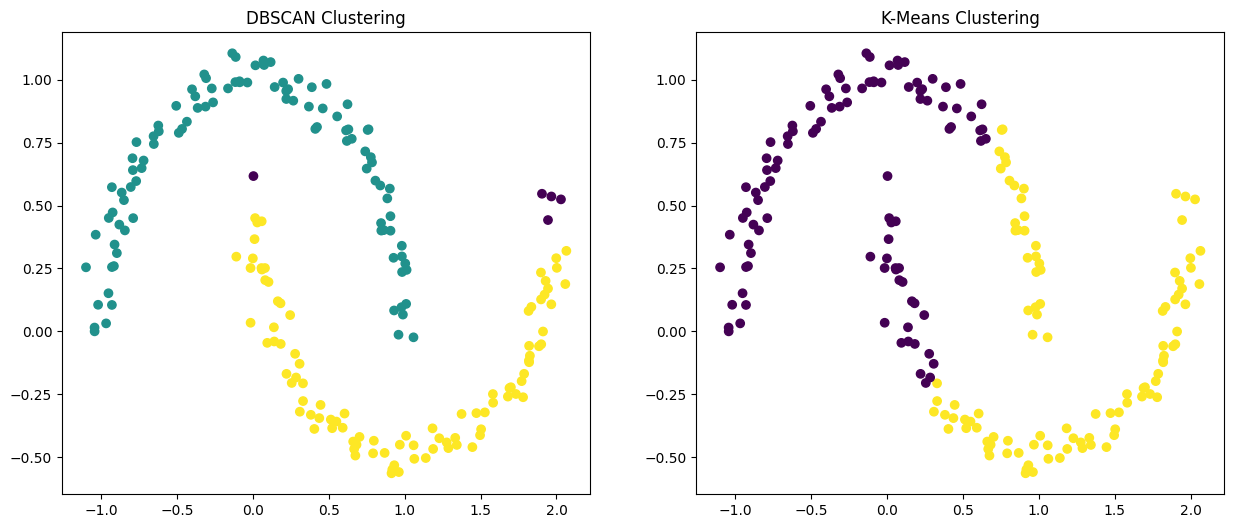

In [51]:
from sklearn.cluster import KMeans
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap="viridis")
ax1.set_title("DBSCAN Clustering")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="viridis")
ax2.set_title("K-Means Clustering")


Ou seja, o DBSCAN percorreu corretamente as duas meia luas enquanto o kmeans separou ao meio.

O kmeans tem dificultade em formatos não convexos.

O dbscan consegue identificar pontos de ruído.